In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor



In [ ]:
import sys
print(sys.executable)


### Reading data

In [4]:
df = pd.read_csv('hypothyroid.csv')
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


### Data Cleaning

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [7]:
# check missing values
df.isna().sum().sort_values(ascending=False)


age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [8]:
df["sex"].value_counts()

sex
F    2480
M    1142
?     150
Name: count, dtype: int64

In [9]:
df=df.replace({"F":1,"M":0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [11]:
# replace missing markers
df = df.replace("?", np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

C:\Users\Yadwinder Kaur\AppData\Local\Temp\ipykernel_21804\4084333224.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("?", np.nan)


In [12]:
df = df.replace("?", np.nan)

In [13]:
# boolean indicators to 0/1
binary_cols = [
    "on thyroxine", "query on thyroxine", "on antithyroid medication",
    "sick", "pregnant", "thyroid surgery", "I131 treatment",
    "query hypothyroid", "query hyperthyroid", "lithium",
    "goitre", "tumor", "hypopituitary", "psych",
    "TSH measured", "T3 measured", "TT4 measured",
    "T4U measured", "FTI measured"
]

df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

C:\Users\Yadwinder Kaur\AppData\Local\Temp\ipykernel_21804\2056274758.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})


In [14]:
df["sex"] = df["sex"].replace({"F": 1, "M": 0})


In [15]:
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [16]:
cat_cols = ["referral source"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [17]:
# target variable encoding
df["binaryClass"].value_counts()


binaryClass
P    3481
N     291
Name: count, dtype: int64

P means Hypothyroid and N means Normal

In [18]:
# convert target to 0/1
df["binaryClass"] = df["binaryClass"].replace({"P": 1, "N": 0})
df["binaryClass"].value_counts()

C:\Users\Yadwinder Kaur\AppData\Local\Temp\ipykernel_21804\2167562995.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["binaryClass"] = df["binaryClass"].replace({"P": 1, "N": 0})


binaryClass
1    3481
0     291
Name: count, dtype: int64

In [19]:
# handling missing values by imputing with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.isna().sum().sort_values(ascending=False)

TBG                          3772
sex                           150
age                             0
query on thyroxine              0
on thyroxine                    0
sick                            0
pregnant                        0
thyroid surgery                 0
on antithyroid medication       0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
I131 treatment                  0
TSH measured                    0
TSH                             0
T3                              0
T3 measured                     0
TT4                             0
T4U measured                    0
T4U                             0
TT4 measured                    0
FTI measured                    0
FTI                             0
TBG measured                    0
binaryClass                     0
referral sourc

In [20]:
df.info()
df.isna().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

np.int64(3922)

In [21]:
df.select_dtypes(include="object").columns

Index(['TBG measured'], dtype='object')

In [22]:
df["TBG measured"] = df["TBG measured"].replace({"t": 1, "f": 0})

C:\Users\Yadwinder Kaur\AppData\Local\Temp\ipykernel_21804\4222126877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TBG measured"] = df["TBG measured"].replace({"t": 1, "f": 0})


In [23]:
df["TBG measured"] = df["TBG measured"].fillna(0).astype(int)

In [24]:
df.select_dtypes(include="object").columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [25]:
df = df.drop(columns=["TBG"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

#### handling missing values

In [26]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [27]:
df.isna().sum().sum()


np.int64(150)

In [28]:
df["sex"].value_counts()

sex
1.0    2480
0.0    1142
Name: count, dtype: int64

In [29]:
df["sex"].isna().sum()

np.int64(150)

In [30]:
df["sex"] = df["sex"].fillna(df["sex"].median())


### EDA

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3772.0,51.736479,20.082329,1.000,36.00,54.00,67.000,455.00
sex,3772.0,0.697243,0.459512,0.000,0.00,1.00,1.000,1.00
on thyroxine,3772.0,0.123012,0.328494,0.000,0.00,0.00,0.000,1.00
query on thyroxine,3772.0,0.013256,0.114382,0.000,0.00,0.00,0.000,1.00
on antithyroid medication,3772.0,0.011400,0.106174,0.000,0.00,0.00,0.000,1.00
sick,3772.0,0.038971,0.193552,0.000,0.00,0.00,0.000,1.00
pregnant,3772.0,0.014051,0.117716,0.000,0.00,0.00,0.000,1.00
thyroid surgery,3772.0,0.014051,0.117716,0.000,0.00,0.00,0.000,1.00
I131 treatment,3772.0,0.015642,0.124101,0.000,0.00,0.00,0.000,1.00
query hypothyroid,3772.0,0.062036,0.241253,0.000,0.00,0.00,0.000,1.00


### Histograms of numerical variables

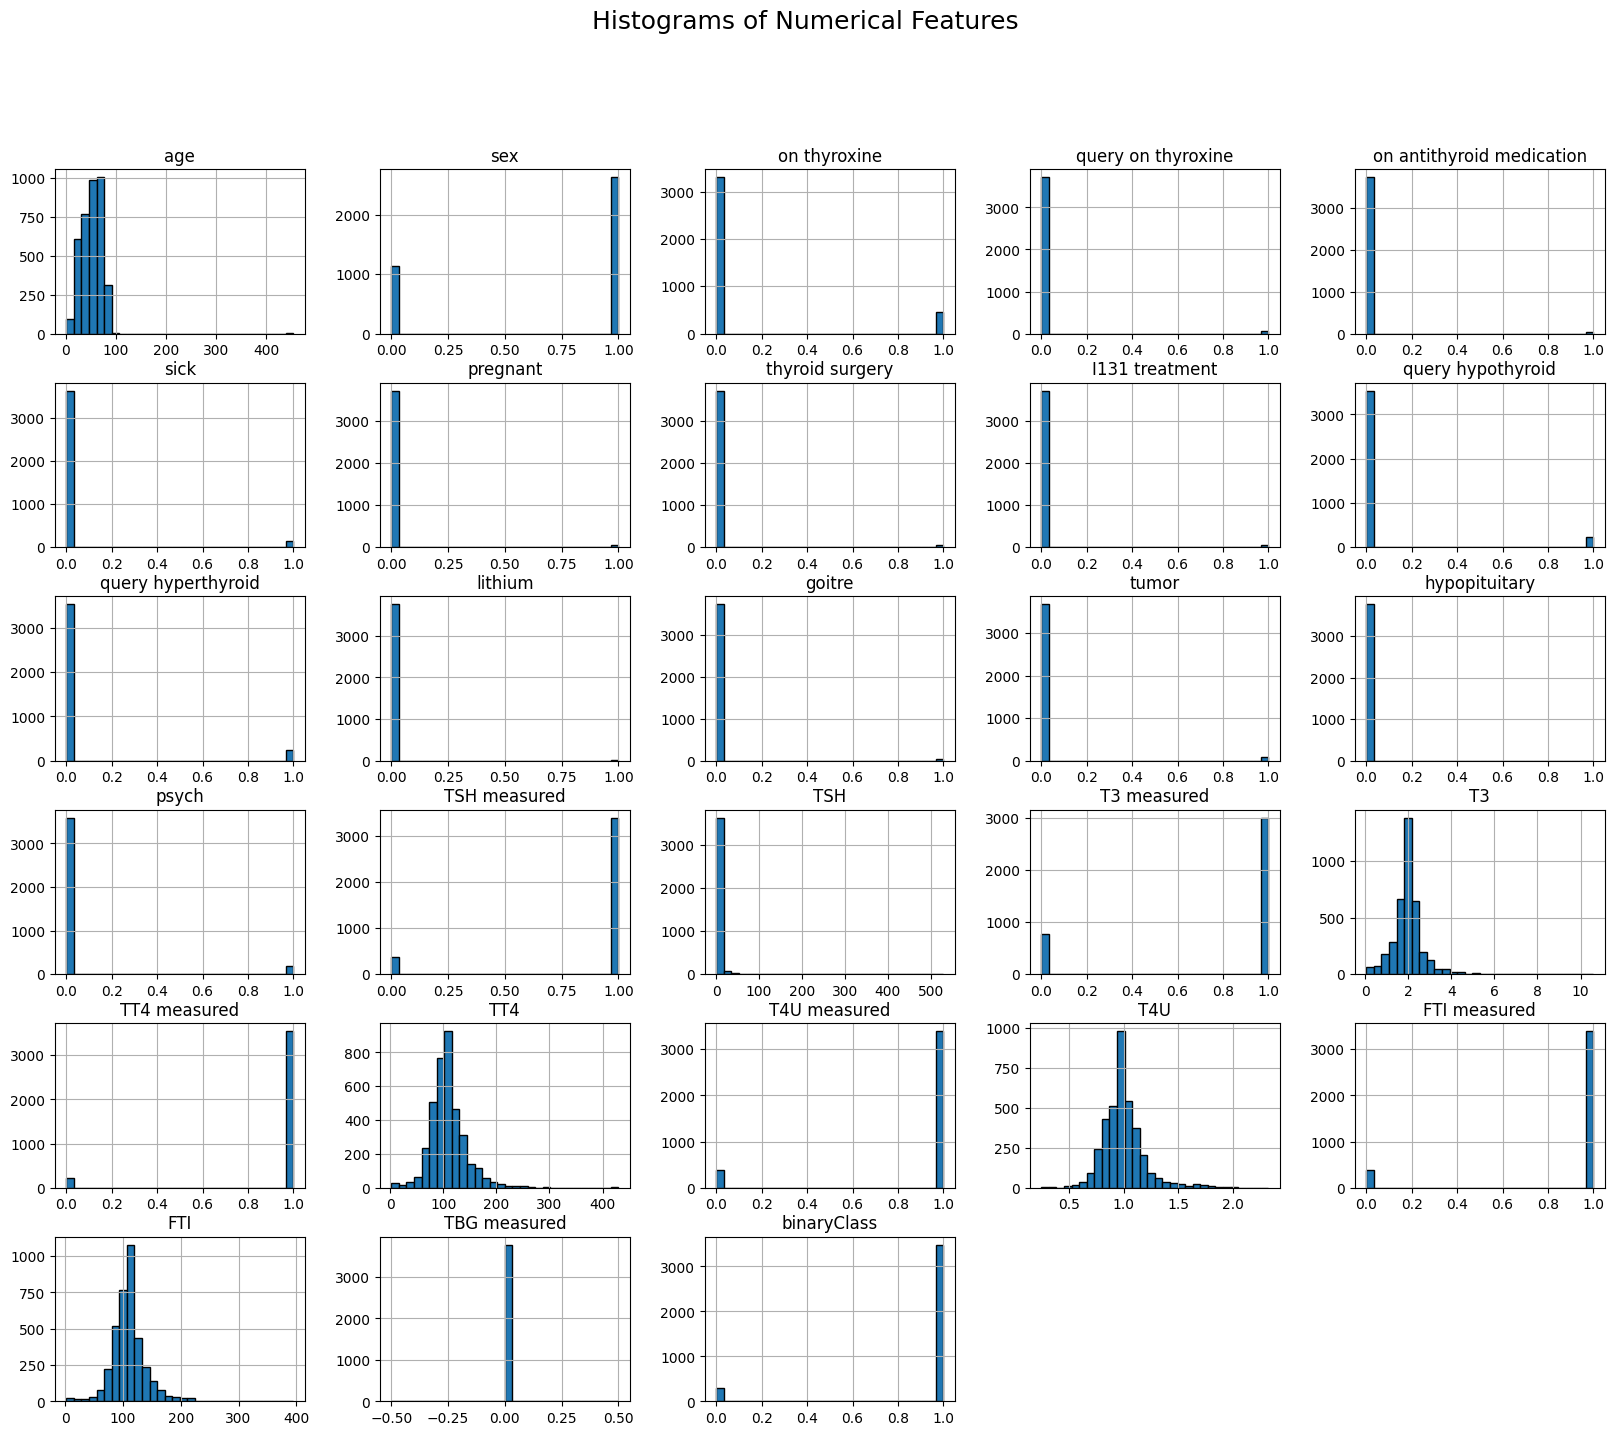

In [32]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(
    bins=30,
    figsize=(20, 16),
    edgecolor="black"
)
plt.suptitle("Histograms of Numerical Features", fontsize=18)
plt.show()


### Correlation matrix

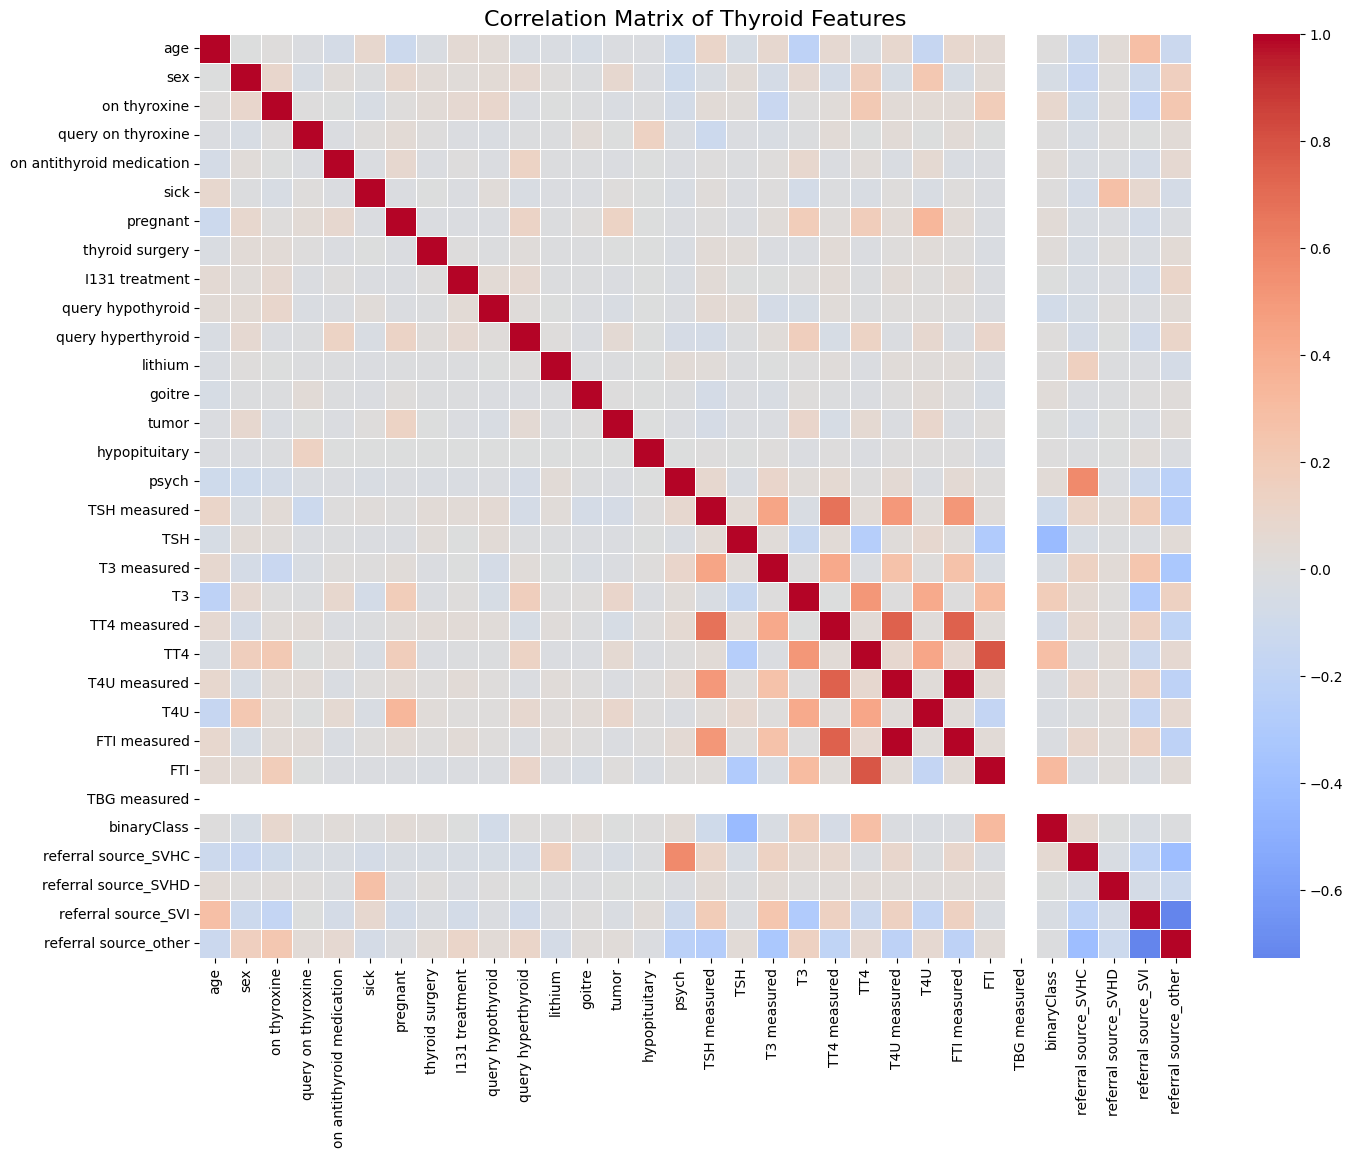

In [33]:
corr = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.4
)
plt.title("Correlation Matrix of Thyroid Features", fontsize=16)
plt.show()


##### Interpretation: The correlation analysis shows that hormone-related features are strongly related to each other, which makes sense because they are all part of thyroid function. On the other hand, most clinical indicators do not show strong correlations on their own. This means that no single feature can clearly explain whether a person has a thyroid disorder. To make accurate predictions, we need to combine multiple features together, which is why using a machine learning model is appropriate for this problem.

In [34]:
target_corr = corr["binaryClass"].sort_values(ascending=False)
target_corr

binaryClass                  1.000000
FTI                          0.313098
TT4                          0.289514
T3                           0.177436
on thyroxine                 0.081060
referral source_SVHC         0.061561
pregnant                     0.034516
psych                        0.028575
goitre                       0.027575
on antithyroid medication    0.021689
thyroid surgery              0.017633
query hyperthyroid           0.013446
query on thyroxine           0.007448
lithium                      0.005603
hypopituitary                0.004708
age                          0.003182
sick                         0.001749
referral source_SVHD         0.000086
I131 treatment              -0.003590
tumor                       -0.003747
referral source_other       -0.006447
FTI measured                -0.015431
T4U measured                -0.015901
T4U                         -0.028720
T3 measured                 -0.032866
referral source_SVI         -0.038377
sex         

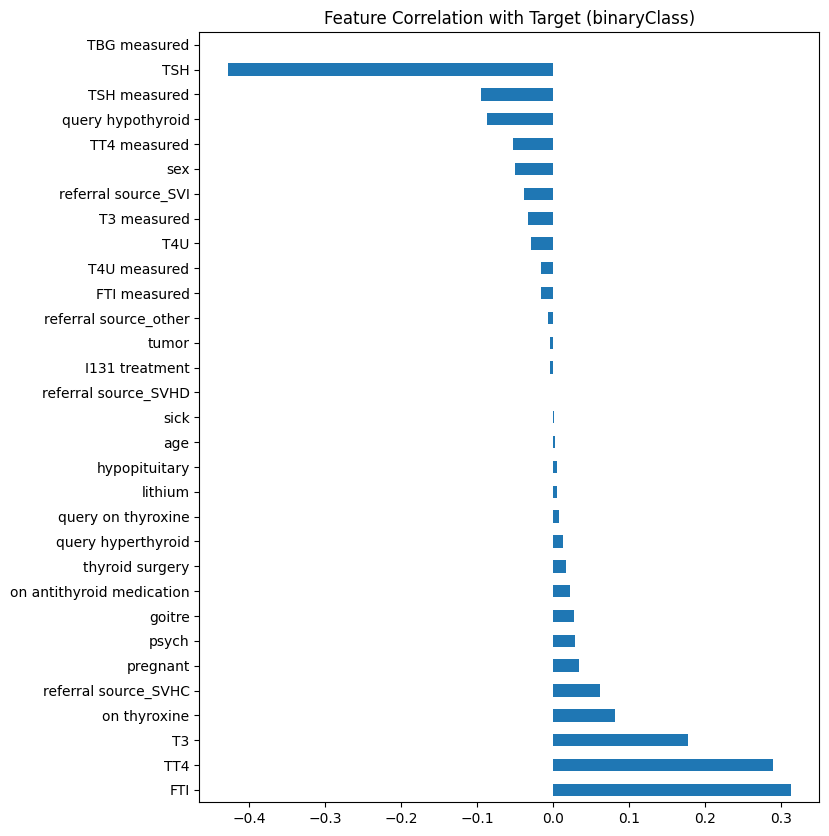

In [35]:
target_corr.drop("binaryClass").plot(
    kind="barh",
    figsize=(8, 10)
)
plt.title("Feature Correlation with Target (binaryClass)")
plt.show()


Interpretation: Hormone-related features are the most important predictors.
Variables like FTI, TT4, and T3 have the strongest positive correlations with the target. This means that changes in these hormone levels are more closely associated with the presence of thyroid disease.

TSH has a strong negative correlation with the target.
The value for TSH (-0.43) indicates that as TSH levels increase, the likelihood of the positive class decreases (and vice versa). This aligns with medical knowledge, since abnormal TSH levels are a key indicator of thyroid dysfunction.

*These correlations suggest that thyroid disease cannot be reliably predicted using a single variable. Instead, combining hormone measurements with clinical indicators using a machine learning model is necessary to capture the full pattern in the data.*

### Train/Test/Split

In [36]:
# define features and target
#X is input features (clinical + hormone data)
#y is target variable (thyroid disease: 0 or 1)
X = df.drop("binaryClass", axis=1)
y = df["binaryClass"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [38]:
#Verify the Split
X_train.shape, X_test.shape

((3017, 31), (755, 31))

In [39]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(binaryClass
 1    0.922771
 0    0.077229
 Name: proportion, dtype: float64,
 binaryClass
 1    0.923179
 0    0.076821
 Name: proportion, dtype: float64)

In [40]:
# checking
print("Overall:\n", y.value_counts(normalize=True))
print("\nTrain:\n", y_train.value_counts(normalize=True))
print("\nTest:\n", y_test.value_counts(normalize=True))


Overall:
 binaryClass
1    0.922853
0    0.077147
Name: proportion, dtype: float64

Train:
 binaryClass
1    0.922771
0    0.077229
Name: proportion, dtype: float64

Test:
 binaryClass
1    0.923179
0    0.076821
Name: proportion, dtype: float64


In [41]:
# validation split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)



In [42]:
print("Train_sub:", X_train_sub.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Train_sub: (2413, 31)
Val: (604, 31)
Test: (755, 31)


In [43]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = []

## Model 1: Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [45]:
# predictions
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_lr

np.float64(0.22801751034149786)

### Interpretation: Linear Regression as a baseline model achieved an RMSE of 0.228. This shows that the relationship between clinical and hormonal features is non-linear and complex. Linear Regression is limited in its predictive performance. Therefore, I will use more advanced models and expect them to perform better.

### “Linear Regression” tuning

In [46]:
from sklearn.linear_model import Ridge

print("Ridge (Linear Model)", end="")

for alpha in np.logspace(-4, 4, 40):
    print(".", end="")
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train_sub, y_train_sub)
    pred = model.predict(X_val)
    results.append({
        "model": "Ridge",
        "alpha": alpha,
        "rmse": rmse(y_val, pred)
    })

print("\nDone Ridge")


Ridge (Linear Model)........................................
Done Ridge


## Model 2: Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [48]:
# predictions
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf


np.float64(0.031071376917931378)

In [49]:
y_pred_rf.min(), y_pred_rf.max()


(np.float64(0.0), np.float64(1.0))

### Interpretation: The error dropped from 0.228 to 0.031, which is a major performance improvement. This shows that Random Forest can capture non-linear patterns and can handle complex medical data much better than Linear Regression

This confirms that thyroid disease prediction cannot be modeled well with a simple linear approach.

### Random Forest hyperparameter tuning

In [50]:
from sklearn.ensemble import RandomForestRegressor

print("RandomForest", end="")

for n_estimators in [100, 200, 500]:
    for max_depth in [None, 5, 10, 20]:
        for min_samples_split in [2, 5, 10]:
            print(".", end="")
            model = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42,
                n_jobs=-1
            )
            model.fit(X_train_sub, y_train_sub)
            pred = model.predict(X_val)
            results.append({
                "model": "RandomForest",
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split,
                "rmse": rmse(y_val, pred)
            })

print("\nDone RandomForest")


RandomForest....................................
Done RandomForest


## Model 3 :XGBoost

In [51]:

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)



In [52]:
# train the model
xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [53]:
# predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb[:10]


array([0.99761605, 1.0015482 , 1.000488  , 1.0012485 , 0.9987355 ,
       1.0006964 , 1.0089852 , 1.003183  , 1.0244718 , 0.95801204],
      dtype=float32)

In [54]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb


np.float64(0.04753500247550829)

In [55]:
# comparing RMSE values of all models
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}") 
print(f"XGBoost RMSE: {rmse_xgb:.4f}")

Linear Regression RMSE: 0.2280
Random Forest RMSE: 0.0311
XGBoost RMSE: 0.0475


Interpretation: Linear Regression performs the worst because it can only model simple, linear relationships. Thyroid disease prediction involves complex interactions between hormone levels and clinical indicators, which a linear model cannot capture well.

Random Forest achieves the lowest RMSE (0.0311), shwoing the best predictive performance. 

XGBoost also performs very well but is slightly worse than Random Forest in this case. This shows that model performance can vary depending on the dataset and that more complex models are not always superior.

### XGBoost Hyperparameter Tuning

In [56]:
X_train_t = X_train.copy()
X_test_t  = X_test.copy()

for c in X_train_t.columns:
    if X_train_t[c].dtype == "bool":
        X_train_t[c] = X_train_t[c].astype(int)
        X_test_t[c]  = X_test_t[c].astype(int)


In [57]:

#Define model + search space
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [200, 300, 500, 800, 1200],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5, 6, 8],
    "min_child_weight": [1, 2, 5, 10],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1.0, 10.0],
    "reg_lambda": [0.5, 1.0, 2.0, 5.0, 10.0],
}


In [58]:
# Run the search (CV)
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,                      # increase to 80 if you want stronger search
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_t, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.03, ...], 'max_depth': [2, 3, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",40
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies tha

In [59]:
# Best parameters + CV score
print("Best CV RMSE:", -search.best_score_)
print("Best Params:", search.best_params_)


Best CV RMSE: 0.06389189288020133
Best Params: {'subsample': 1.0, 'reg_lambda': 10.0, 'reg_alpha': 0.1, 'n_estimators': 800, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}


In [60]:
# Evaluate tuned model on test set
best_xgb = search.best_estimator_

y_pred_tuned = best_xgb.predict(X_test_t)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
rmse_tuned


np.float64(0.0495283087750646)

### comparing  tuned XGBoost vs previous models

In [61]:
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Random Forest RMSE:    {rmse_rf:.4f}")
print(f"XGBoost (old) RMSE:    {rmse_xgb:.4f}")
print(f"XGBoost (tuned) RMSE:  {rmse_tuned:.4f}")


Linear Regression RMSE: 0.2280
Random Forest RMSE:    0.0311
XGBoost (old) RMSE:    0.0475
XGBoost (tuned) RMSE:  0.0495


In [62]:
# Results table: best config per model (validation RMSE)
results_df = pd.DataFrame(results)

best_by_model = results_df.sort_values("rmse").groupby("model").head(1)
best_by_model


,model,alpha,rmse,n_estimators,max_depth,min_samples_split
45,RandomForest,NaN,0.085650,100.0,5.0,10.0
24,Ridge,8.376776,0.236574,NaN,NaN,NaN


### Train “tuned winners” on full train and evaluate on TEST

#### Linear Regression : Ridge Test

In [63]:
best_ridge = best_by_model[best_by_model["model"]=="Ridge"].iloc[0]
ridge_final = Ridge(alpha=best_ridge["alpha"], random_state=42)
ridge_final.fit(X_train, y_train)
pred_ridge_test = ridge_final.predict(X_test)
rmse_ridge_test = rmse(y_test, pred_ridge_test)
rmse_ridge_test
print(f"Ridge Test RMSE: {rmse_ridge_test:.4f}")

Ridge Test RMSE: 0.2277


### Random Forest

In [65]:

best_rf = best_by_model[best_by_model["model"]=="RandomForest"].iloc[0]

rf_final = RandomForestRegressor(
    n_estimators=int(best_rf["n_estimators"]),
    max_depth=int(best_rf["max_depth"]),            # 5.0 -> 5
    min_samples_split=int(best_rf["min_samples_split"]),  # 10.0 -> 10
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)

pred_rf_test = rf_final.predict(X_test)
rmse_rf_test = rmse(y_test, pred_rf_test)
rmse_rf_test



np.float64(0.03707059233166892)

In [66]:
results_df["model"].value_counts()


model
Ridge           40
RandomForest    36
Name: count, dtype: int64

### XGBoost hyperparameter loop

In [67]:
from xgboost import XGBRegressor

print("XGBoost", end="")

for n_estimators in [200, 300, 500]:
    for learning_rate in [0.01, 0.05, 0.1]:
        for max_depth in [3, 5, 7]:
            print(".", end="")
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                subsample=0.8,
                colsample_bytree=0.8,
                objective="reg:squarederror",
                random_state=42,
                n_jobs=-1
            )
            model.fit(X_train_sub, y_train_sub)
            pred = model.predict(X_val)
            results.append({
                "model": "XGBoost",
                "n_estimators": int(n_estimators),
                "learning_rate": float(learning_rate),
                "max_depth": int(max_depth),
                "rmse": rmse(y_val, pred)
            })

print("\nDone XGBoost")


XGBoost...........................
Done XGBoost


In [68]:
results_df = pd.DataFrame(results)

results_df["model"].value_counts()


model
Ridge           40
RandomForest    36
XGBoost         27
Name: count, dtype: int64

In [69]:
results_df = pd.DataFrame(results)

best_by_model = (
    results_df.sort_values("rmse")
    .groupby("model", as_index=False)
    .first()
)

best_by_model



,model,alpha,rmse,n_estimators,max_depth,min_samples_split,learning_rate
0,RandomForest,NaN,0.085650,100.0,5.0,10.0,NaN
1,Ridge,8.376776,0.236574,NaN,NaN,NaN,NaN
2,XGBoost,NaN,0.101542,500.0,3.0,NaN,0.01


### extracting the best model : XGBoost

In [70]:
best_xgb = best_by_model.loc[best_by_model["model"]=="XGBoost"].iloc[0]
best_xgb


model                 XGBoost
alpha                     NaN
rmse                 0.101542
n_estimators            500.0
max_depth                 3.0
min_samples_split         NaN
learning_rate            0.01
Name: 2, dtype: object

Train tuned XGBoost on full train and evaluate on test

In [71]:
from xgboost import XGBRegressor

xgb_final = XGBRegressor(
    n_estimators=int(best_xgb["n_estimators"]),
    learning_rate=float(best_xgb["learning_rate"]),
    max_depth=int(best_xgb["max_depth"]),
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_final.fit(X_train, y_train)
pred_xgb_test = xgb_final.predict(X_test)
rmse_xgb_test = rmse(y_test, pred_xgb_test)
rmse_xgb_test



np.float64(0.05002321657950885)

## comapring all tuned models

In [72]:
from sklearn.linear_model import Ridge

best_ridge = best_by_model.loc[best_by_model["model"]=="Ridge"].iloc[0]

ridge_final = Ridge(alpha=float(best_ridge["alpha"]), random_state=42)
ridge_final.fit(X_train, y_train)
pred_ridge_test = ridge_final.predict(X_test)
rmse_ridge_test = rmse(y_test, pred_ridge_test)
rmse_ridge_test


np.float64(0.22770079662505344)

In [73]:
final_compare = pd.DataFrame({
    "Model": ["Ridge (tuned)", "Random Forest (tuned)", "XGBoost (tuned)"],
    "Test_RMSE": [rmse_ridge_test, rmse_rf_test, rmse_xgb_test]
}).sort_values("Test_RMSE")

final_compare

,Model,Test_RMSE
1,Random Forest (tuned),0.037071
2,XGBoost (tuned),0.050023
0,Ridge (tuned),0.227701


In [74]:
final_compare = pd.DataFrame({
    "Model": ["Ridge (tuned)", "Random Forest (tuned)", "XGBoost (tuned)"],
    "Test_RMSE": [rmse_ridge_test, rmse_rf_test, rmse_xgb_test]
}).sort_values("Test_RMSE")

final_compare

,Model,Test_RMSE
1,Random Forest (tuned),0.037071
2,XGBoost (tuned),0.050023
0,Ridge (tuned),0.227701


### Train + Test for tuned RandomForest, Ridge, and XGBoost

### Tuned Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

best_rf = best_by_model.loc[best_by_model["model"]=="RandomForest"].iloc[0]

rf_final = RandomForestRegressor(
    n_estimators=int(best_rf["n_estimators"]),
    max_depth=int(best_rf["max_depth"]),
    min_samples_split=int(best_rf["min_samples_split"]),
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)
pred_rf_test = rf_final.predict(X_test)
rmse_rf_test = rmse(y_test, pred_rf_test)
rmse_rf_test


np.float64(0.037070592331668914)

### Tuned Ridge (linear model)

In [76]:


best_ridge = best_by_model.loc[best_by_model["model"]=="Ridge"].iloc[0]

ridge_final = Ridge(alpha=float(best_ridge["alpha"]), random_state=42)
ridge_final.fit(X_train, y_train)
pred_ridge_test = ridge_final.predict(X_test)
rmse_ridge_test = rmse(y_test, pred_ridge_test)
rmse_ridge_test


np.float64(0.22770079662505344)

### Tuned XGBoost

In [77]:


best_xgb = best_by_model.loc[best_by_model["model"]=="XGBoost"].iloc[0]

xgb_final = XGBRegressor(
    n_estimators=int(best_xgb["n_estimators"]),
    learning_rate=float(best_xgb["learning_rate"]),
    max_depth=int(best_xgb["max_depth"]),
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_final.fit(X_train, y_train)
pred_xgb_test = xgb_final.predict(X_test)
rmse_xgb_test = rmse(y_test, pred_xgb_test)
rmse_xgb_test


np.float64(0.05002321657950885)

### Final comparison table (Test RMSE)

In [78]:
final_compare = pd.DataFrame({
    "Model": ["Ridge (tuned)", "Random Forest (tuned)", "XGBoost (tuned)"],
    "Test_RMSE": [rmse_ridge_test, rmse_rf_test, rmse_xgb_test]
}).sort_values("Test_RMSE")

final_compare


,Model,Test_RMSE
1,Random Forest (tuned),0.037071
2,XGBoost (tuned),0.050023
0,Ridge (tuned),0.227701


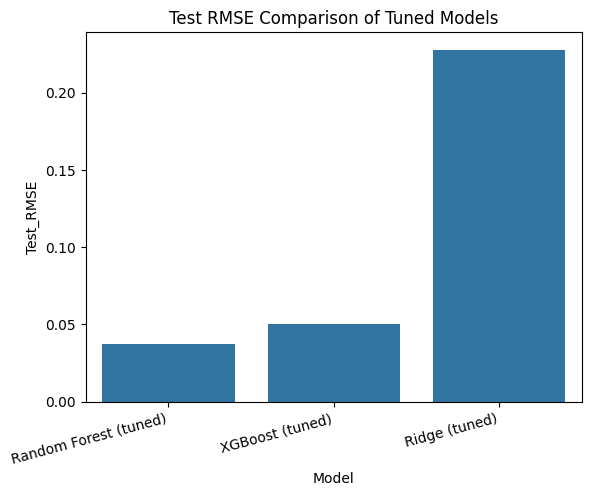

In [79]:
sns.barplot(data=final_compare, x="Model", y="Test_RMSE")
plt.title("Test RMSE Comparison of Tuned Models")
plt.xticks(rotation=15, ha="right")
plt.show()

#### Random Forest (tuned) has the lowest test RMSE (0.0371), so it is the best tuned model. XGBoost (tuned) is also strong (0.0500) but still worse than Random Forest on this dataset/split. Ridge (tuned) performs much worse (0.2277) because a linear model can’t capture the non-linear relationships in hormone + clinical features.

In [80]:
import json

sample = X_test.iloc[0].to_dict()
print(json.dumps(sample))
print("true label:", int(y_test.iloc[0]))


{"age": 16.0, "sex": 0.0, "on thyroxine": 0, "query on thyroxine": 0, "on antithyroid medication": 0, "sick": 0, "pregnant": 0, "thyroid surgery": 0, "I131 treatment": 0, "query hypothyroid": 0, "query hyperthyroid": 0, "lithium": 0, "goitre": 0, "tumor": 0, "hypopituitary": 0, "psych": 0, "TSH measured": 1, "TSH": 0.4, "T3 measured": 1, "T3": 1.7, "TT4 measured": 1, "TT4": 88.0, "T4U measured": 1, "T4U": 0.89, "FTI measured": 1, "FTI": 99.0, "TBG measured": 0, "referral source_SVHC": false, "referral source_SVHD": false, "referral source_SVI": true, "referral source_other": false}
true label: 1
